In [4]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn import model_selection

bruker    = pd.read_csv("sample_data/bruker.csv")
film      = pd.read_csv("sample_data/film.csv")
rangering = pd.read_csv("sample_data/rangering.csv")

seed = 123
#Tar ut et tilfeldig utvalg brukere, 70% til trening , 15% til validering og 15% til testing

# Shuffle and split the data into train and a concatenation of validation and test sets with a ratio of 0.7/0.3:
train,val_test = model_selection.train_test_split(bruker,
                                              test_size=0.3,
                                              shuffle=True,
                                              random_state=seed)
# Shuffle and split the data into validation and test sets with a ratio of 0.5/0.5:
validation,test = model_selection.train_test_split(val_test,
                                                    test_size=0.5,
                                                    shuffle=True,
                                                    random_state=seed)
film

,FilmID,Tittel,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,0,Autumn in New York (2000),0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0
1,1,"Vie est belle, La (Life is Rosey) (1987)",0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0
2,2,Defying Gravity (1997),0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
3,3,Ruthless People (1986),0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
4,4,Portraits Chinois (1996),0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
489,496,Lethal Weapon 4 (1998),1,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0
490,497,Only You (1994),0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0
491,498,You Can't Take It With You (1938),0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
492,499,Home for the Holidays (1995),0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0


In [5]:
train_rangering = pd.merge(rangering,train,on = ["BrukerID","BrukerID"])
val_rangering = pd.merge(rangering,validation,on = ["BrukerID","BrukerID"])
test_rangering = pd.merge(rangering,test,on = ["BrukerID","BrukerID"])
train_rangering

,BrukerID,FilmID,Rangering,Tidstempel,Kjonn,Alder,Jobb,Postkode
0,0,88,3,959441640,M,45,6,92103
1,0,365,3,959442446,M,45,6,92103
2,0,150,5,959442486,M,45,6,92103
3,0,161,3,959442624,M,45,6,92103
4,0,323,4,959442669,M,45,6,92103
...,...,...,...,...,...,...,...,...
4227,381,228,4,975871874,F,18,4,44425
4228,381,129,5,975871920,F,18,4,44425
4229,381,395,4,975872077,F,18,4,44425
4230,381,83,4,975872136,F,18,4,44425


In [6]:
rangering_film= pd.merge(train_rangering,film,on = ["FilmID","FilmID"])

rangering_film

,BrukerID,FilmID,Rangering,Tidstempel,Kjonn,Alder,Jobb,Postkode,Tittel,Action,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,0,88,3,959441640,M,45,6,92103,Star Trek: Insurrection (1998),1,...,0,0,0,0,0,0,1,0,0,0
1,11,88,5,966189467,M,35,1,44242,Star Trek: Insurrection (1998),1,...,0,0,0,0,0,0,1,0,0,0
2,38,88,2,974782366,M,25,14,60153,Star Trek: Insurrection (1998),1,...,0,0,0,0,0,0,1,0,0,0
3,47,88,4,969037463,F,25,4,78728,Star Trek: Insurrection (1998),1,...,0,0,0,0,0,0,1,0,0,0
4,48,88,3,965873520,M,25,17,20886,Star Trek: Insurrection (1998),1,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4227,308,461,2,976417278,F,18,2,72701,Permanent Midnight (1998),0,...,0,0,0,0,0,0,0,0,0,0
4228,280,103,3,968452461,M,25,4,95616,Schizopolis (1996),0,...,0,0,0,0,0,0,0,0,0,0
4229,308,100,3,976419340,F,18,2,72701,Come See the Paradise (1990),0,...,0,0,0,0,0,1,0,0,0,0
4230,374,208,2,980124271,M,45,14,07458,Suture (1993),0,...,0,1,0,0,0,0,0,1,0,0


In [7]:
#Making a dataframe with the mean value of a films rating
mean_rating = rangering_film.groupby('Tittel')['Rangering'].mean().reset_index()
#Making a dataframe with the number of times a movie has been rated
count = rangering_film.groupby("Tittel")['Rangering'].count().reset_index()
count.columns = ["Tittel","Antall anmeldelser"]
#Merge the dataframes created above
rating_num = pd.merge(mean_rating,count,on=["Tittel","Tittel"])
rating_num


,Tittel,Rangering,Antall anmeldelser
0,'Til There Was You (1997),3.000000,1
1,200 Cigarettes (1999),3.000000,1
2,2010 (1984),3.875000,16
3,Action Jackson (1988),2.571429,7
4,Adventures of Buckaroo Bonzai Across the 8th D...,3.148148,27
...,...,...,...
369,Working Girl (1988),3.333333,15
370,"World Is Not Enough, The (1999)",3.437500,32
371,"Wrong Trousers, The (1993)",4.478261,23
372,You Can't Take It With You (1938),3.800000,5


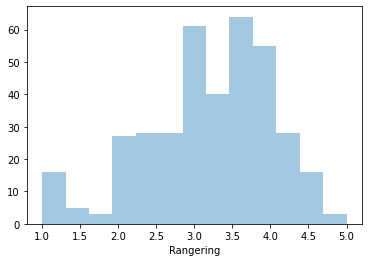

In [8]:
sb.distplot(mean_rating["Rangering"],kde = False)

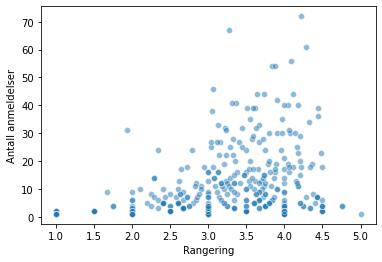

In [9]:
sb.scatterplot(x = "Rangering",y="Antall anmeldelser",data = rating_num,alpha=0.5)

In [10]:
#Lager en matrise med brukerne på y aksen og filmene på x aksen, verdien i matrisen er rangeringen 
movieMatrix = rangering_film.pivot_table(index='BrukerID',columns='Tittel',values='Rangering')
movieMatrix.head()

Tittel,'Til There Was You (1997),200 Cigarettes (1999),2010 (1984),Action Jackson (1988),"Adventures of Buckaroo Bonzai Across the 8th Dimension, The (1984)","Adventures of Milo and Otis, The (1986)","Adventures of Priscilla, Queen of the Desert, The (1994)",Air America (1990),"Air Up There, The (1994)",Alien³ (1992),...,White Christmas (1954),Why Do Fools Fall In Love? (1998),Wild Wild West (1999),Winnie the Pooh and the Blustery Day (1968),With Honors (1994),Working Girl (1988),"World Is Not Enough, The (1999)","Wrong Trousers, The (1993)",You Can't Take It With You (1938),Young Sherlock Holmes (1985)
BrukerID,,,,,,,,,,,,,,,,,,,,,
0,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,...,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,...,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
#Gets the correlation of one movie to the others
def movie_correlation_user_rating(movie):
    similar_to_movie = movieMatrix.corrwith(movieMatrix[movie])
    corr_movie = pd.DataFrame(similar_to_movie,columns=['Correlation'])
    #Removes NaN values
    corr_movie.dropna(inplace=True)
    #Sorts from highest correlation to lowest
    corr_movie.sort_values('Correlation' ,ascending=False,inplace = True)
    #Adding number of reviews
    corr_movie = pd.merge(corr_movie,rating_num,on=["Tittel","Tittel"])
    #Removing unnecesary column
    corr_movie.drop(["Rangering"],axis=1,inplace = True)
    return corr_movie

def movie_correlation_  

movie_correlation_user_rating("Alien³ (1992)")


    

C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\function_base.py:2526: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\function_base.py:2455: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


,Tittel,Correlation,Antall anmeldelser
0,Alien³ (1992),1.0,33
1,Miller's Crossing (1990),1.0,12
2,"Apple Dumpling Gang Rides Again, The (1979)",1.0,5
3,"Navigator: A Mediaeval Odyssey, The (1988)",1.0,8
4,"Believers, The (1987)",1.0,5
...,...,...,...
169,Digimon: The Movie (2000),-1.0,4
170,Herbie Goes Bananas (1980),-1.0,5
171,Ordinary People (1980),-1.0,15
172,Still Crazy (1998),-1.0,3


In [173]:
#Lists the movies the user have watched and the rankings
def user_movies(user):
    df = rangering_film[rangering_film["BrukerID"]==user]
    df.drop(df.columns[3:8],inplace = True,axis = 1)
    df.drop(df.columns[4:len(df.columns)],inplace = True,axis = 1)
    #Sorterer filmene etter rangeringen brukeren har gitt dem
    df.sort_values("Rangering",ascending=False,inplace = True)
    return(df)


def item_based_prediction(user):
    

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:3990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
<ipython-input-173-8d8839aea5c7>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.sort_values("Rangering",ascending=False,inplace = True)


,BrukerID,FilmID,Rangering,Tittel
83,0,150,5,Blade Runner (1982)
552,0,494,5,Diva (1981)
548,0,325,5,Beautiful Thing (1996)
491,0,283,5,Lady and the Tramp (1955)
461,0,367,5,Bambi (1942)
526,0,162,4,"Rescuers, The (1977)"
764,0,165,4,Atlantic City (1980)
690,0,133,4,My Fair Lady (1964)
408,0,30,4,"Wrong Trousers, The (1993)"
338,0,442,4,"Lost World: Jurassic Park, The (1997)"


In [2]:
#TODO lag matrix med brukerne
user_matrix = train.pivot_table(index='BrukerID',columns='Tittel',values='Rangering')
user_matrix

KeyError: 'Rangering'